/tmp/ipykernel_64306/4035203891.py:29: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi /= np.sqrt(np.trapz(psi ** 2, r))
/tmp/ipykernel_64306/4035203891.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  psi_cont /= np.sqrt(np.trapz(psi_cont ** 2, r))
/tmp/ipykernel_64306/4035203891.py:43: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(integrand, r)


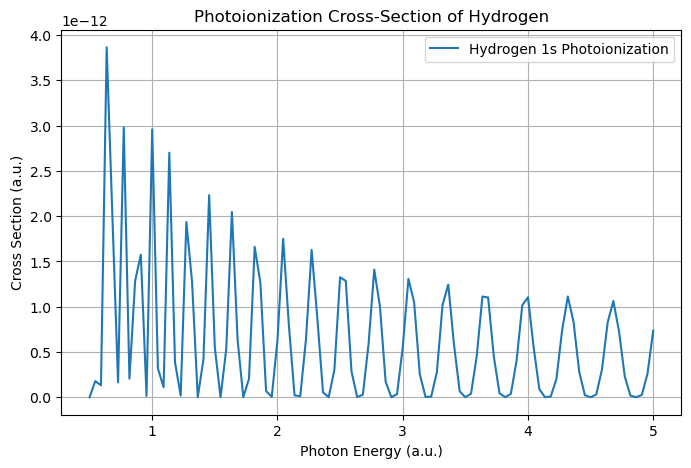

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants in atomic units
hbar = 1  # Planck's constant / 2π
m_e = 1   # Electron mass
Z = 1     # Hydrogen nuclear charge
alpha = 1 / 137.036  # Fine-structure constant

# Define radial grid
r_min, r_max = 0.001, 50  # Avoid singularity at r = 0
num_points = 10000
r = np.linspace(r_min, r_max, num_points)
dr = r[1] - r[0]

# Hydrogen potential function
def V_H(r):
    return -Z / r

# Solve radial Schrödinger equation using finite difference method
def solve_schrodinger(E, l):
    V = V_H(r)
    rsqr = r * r
    H_diag = V + (l * (l + 1)) / (2 * rsqr)
    H_off_diag = -1 / (2 * dr ** 2) * np.ones(num_points - 1)
    
    eigvals, eigvecs = np.linalg.eigh(np.diag(H_diag) + np.diag(H_off_diag, k=-1) + np.diag(H_off_diag, k=1))
    psi = eigvecs[:, np.argmin(np.abs(eigvals - E))]
    psi /= np.sqrt(np.trapz(psi ** 2, r))
    
    return psi

# Continuum wavefunction using plane wave approximation
def continuum_wavefunction(E, l):
    k = np.sqrt(2 * E)
    psi_cont = np.sin(k * r) / r
    psi_cont /= np.sqrt(np.trapz(psi_cont ** 2, r))
    return psi_cont

# Dipole matrix element
def dipole_matrix_element(psi_bound, psi_cont):
    integrand = r * psi_bound * psi_cont
    return np.trapz(integrand, r)

# Compute cross-section as a function of photon energy
photon_energies = np.linspace(0.5, 5, 100)  # Photon energies in a.u.
cross_sections = []

# Solve for bound state (1s, n=1, l=0)
E_bound = -0.5  # Hydrogen ground state energy
psi_bound = solve_schrodinger(E_bound, l=0)

for E_photon in photon_energies:
    E_ejected = E_photon - abs(E_bound)
    if E_ejected <= 0:
        cross_sections.append(0)
        continue
    
    psi_cont = continuum_wavefunction(E_ejected, l=1)
    dipole = dipole_matrix_element(psi_bound, psi_cont)
    sigma = (4 * np.pi ** 2 * alpha * dipole ** 2) / (3 * E_ejected)
    cross_sections.append(sigma)

# Plot photoionization cross-section
plt.figure(figsize=(8, 5))
plt.plot(photon_energies, cross_sections, label="Hydrogen 1s Photoionization")
plt.xlabel("Photon Energy (a.u.)")
plt.ylabel("Cross Section (a.u.)")
plt.title("Photoionization Cross-Section of Hydrogen")
plt.legend()
plt.grid()
plt.show()
